In [ ]:
from diffusers import StableDiffusionImageVariationPipeline
from torchvision import transforms
from PIL import Image
import os
import torch

# Load the trained pipeline
output_dir = '/home/rmuproject/rmuproject/users/sandesh/FinetunedSDIVP/models/80_epochs'  # Directory where the pipeline was saved
pipeline = StableDiffusionImageVariationPipeline.from_pretrained(output_dir)
# Move the pipeline to the appropriate device
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline.to(device)
pipeline.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 10.92it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_image_variation.StableDiffusionImageVariationPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:

input_image_folder = '/home/rmuproject/rmuproject/users/sandesh/FinetunedSDIVP/scripts/Hareque.png'
input_image = Image.open(input_image_folder).convert("RGB")
width, height = input_image.size
print(f"Original size: {width}x{height}")
input_image_resized = input_image.resize((512, 512))
seed = [42, 41, 20, 425,65]
num_variations = 5
# generator = torch.Generator(device="cuda").manual_seed(seed)
alphabets = ['a', 'b', 'c', 'd', 'e']
generated_images = []
for i in range(num_variations):
    generator = torch.Generator(device="cuda").manual_seed(seed[i])
    images = pipeline(
        image=input_image_resized,
        num_inference_steps=50,  # Number of diffusion steps
        guidance_scale=2.5,  # Scale for conditional guidance
        generator=generator
    ).images
    generated_images.append(images[0])

for j, img in enumerate(generated_images):
        # Resize the generated images to the output dimension
        resized_image = img.resize((width, height))
        resized_image.save(f"/home/rmuproject/rmuproject/users/sandesh/FinetunedSDIVP/output1{alphabets[j]}.png")

Original size: 900x1200


100%|██████████| 50/50 [00:12<00:00,  4.07it/s]


*********************************************************************
Now plotting variations
*********************************************************************


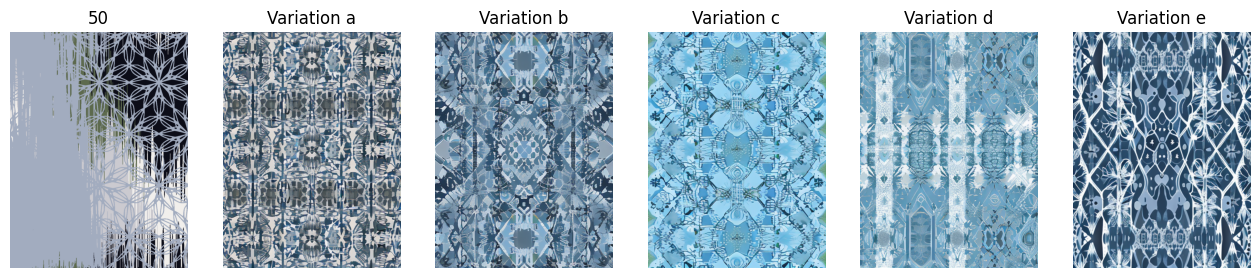

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
num_variations = 5
alphabets = ['a', 'b', 'c', 'd', 'e']
# input_folder = '/home/rmuproject/rmuproject/users/sandesh/renders/'
output_folder = '/home/rmuproject/rmuproject/users/sandesh/FinetunedSDIVP/'


print('*********************************************************************')
print('Now plotting variations')
print('*********************************************************************')
# Define folder for each image
# image_path = os.path.join(input_folder, "input_45.png")
# Visualize the input image and generated variations
fig, ax = plt.subplots(1, num_variations + 1, figsize=(16, 6))

# Load original image
# test_image = Image.open(image_path).convert("RGB")
ax[0].imshow(input_image)
ax[0].set_title("50")
ax[0].axis("off")

for j in range(num_variations):
    variation_path = os.path.join(output_folder, f"output1{alphabets[j]}.png")
    variation_image = Image.open(variation_path).convert("RGB")

    ax[j+1].imshow(variation_image)
    ax[j+1].set_title(f"Variation {alphabets[j]}")
    ax[j+1].axis("off")

plt.show()